In [1]:
# python libraries
import numpy as np

In [2]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [4]:
# test files
import Solve

### Convienent Zs:

In [5]:
Z_neutron  = 0
Z_proton   = 1
Z_deuteron = 1
Z_alpha    = 2
Z_helium   = 4
Z_carbon   = 6
Z_nitrogen = 7
Z_oxygen   = 8
Z_neon     = 10
Z_argon    = 18
Z_iron     = 26
Z_krypton  = 36
Z_xenon    = 54
Z_uranium  = 92

# Solve some Trajectories

In [7]:
# each takes about 2 minutes

start_pos = np.array([2,3,4]) # [astronomical units, sun is at (0,0,0)]
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path1.dat')

start_pos = np.array([4,3,2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path2.dat')

start_pos = np.array([-3,4,-2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path3.dat')

start_pos = np.array([-4,-4,0]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path4.dat')

start_pos = np.array([-1,-1,-1]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path5.dat')

# Plot Trajectories

file: ./test_path1.dat
elapsed time: 219.628000021
exit statii: successful, near-earth
Z, E: 92, 2e+18
Heading change [degrees]: [1.76819189 2.19981113 2.47262858]
End distance from Earth [Earth Radii]: 1.99789451296
End coordinate location [AU]: 1.0000381441, 7.16260465484e-05, 2.58920312929e-05
End coordinate location from Earth [Earth Radii]: [0.89466707 1.6799837  0.60729571]

file: ./test_path2.dat
elapsed time: 211.64199996
exit statii: successful, near-earth
Z, E: 92, 2e+18
Heading change [degrees]: [2.26477692 2.26477692 2.01130699]
End distance from Earth [Earth Radii]: 1.99544724705
End coordinate location [AU]: 1.00006047906, 5.9626221249e-05, 4.98928543303e-06
End coordinate location from Earth [Earth Radii]: [1.41853192 1.39852867 0.11702333]

file: ./test_path3.dat
elapsed time: 249.867000103
exit statii: successful, near-earth
Z, E: 92, 2e+18
Heading change [degrees]: [0.84106867 2.30052398 1.23095942]
End distance from Earth [Earth Radii]: 1.99315971917
End coordinate l

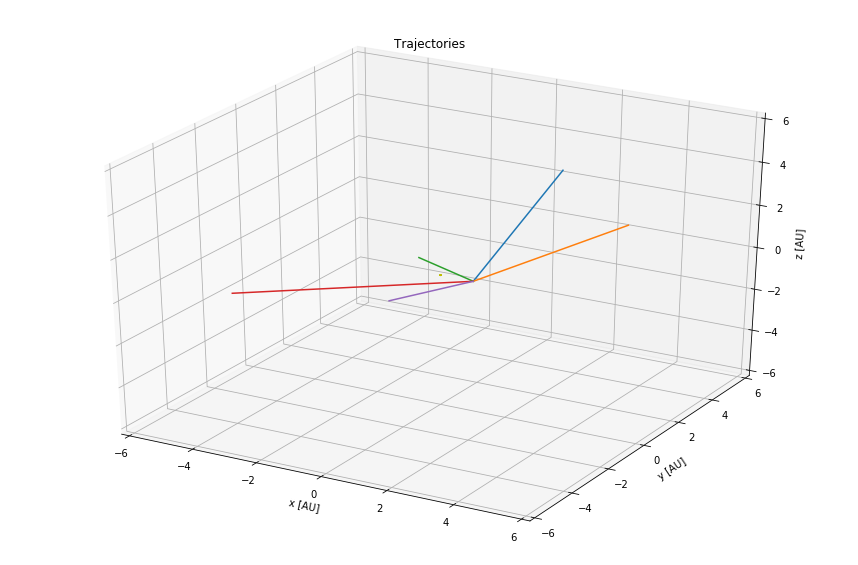

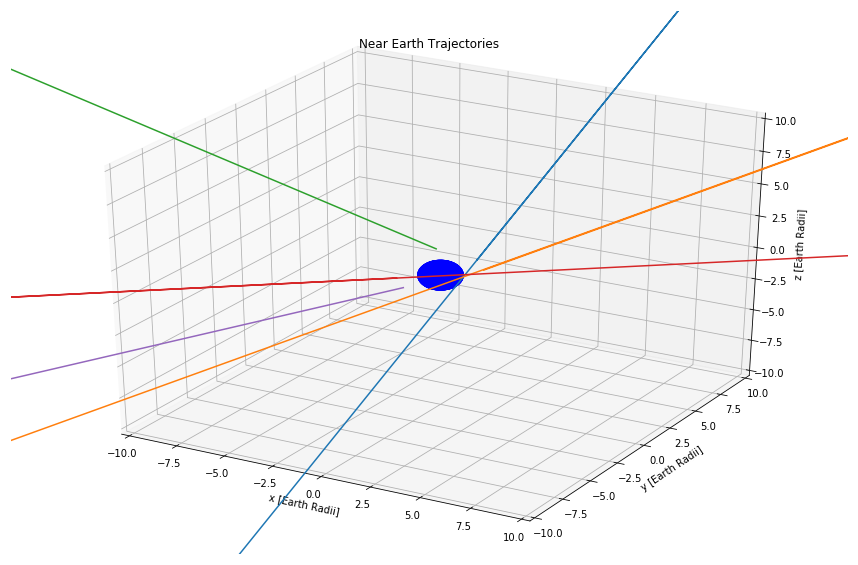

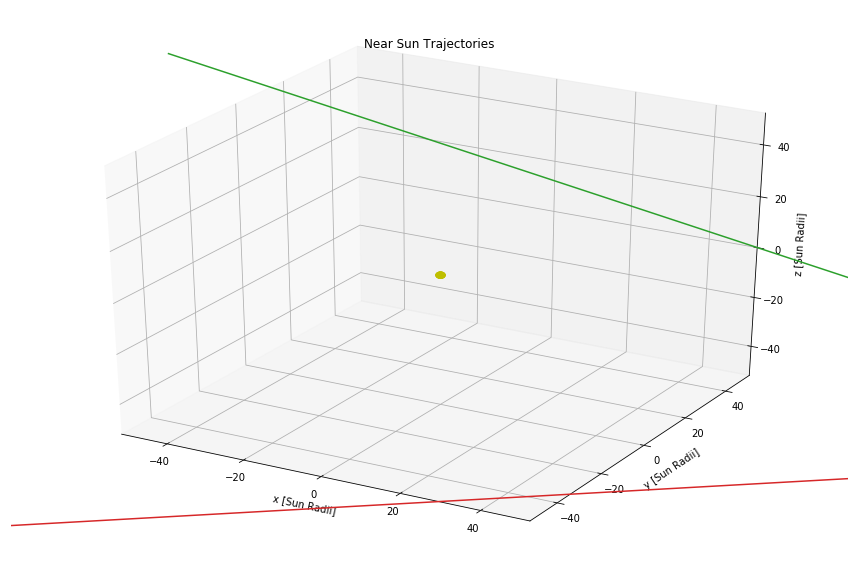

In [42]:
Solve.plot(['./test_path1.dat', './test_path2.dat', './test_path3.dat', './test_path4.dat', './test_path5.dat'])

In [8]:
start_pos = np.array([2,3,4]) # [astronomical units, sun is at (0,0,0)]
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path1.new')

C:\Users\EricK\crayfis\GZ\python\Solve.py:111: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(earth_diff, heading)) * 180. / np.pi


In [9]:
Solve.plot(['./test_path1.new'])

AttributeError: 'module' object has no attribute 'plot'

In [6]:
import File

(<module 'matplotlib.pyplot' from 'C:\Users\EricK\Anaconda3\envs\py2\lib\site-packages\matplotlib\pyplot.pyc'>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x8f2a6a0>)

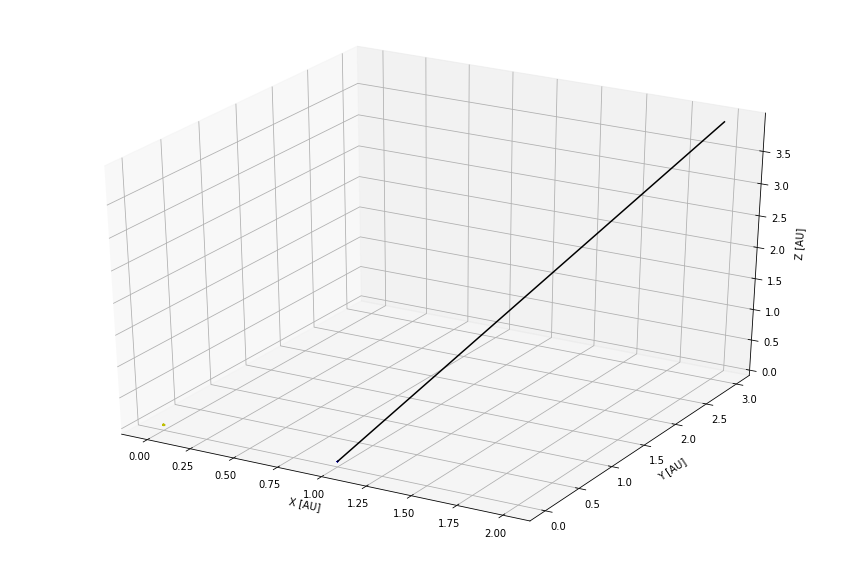

In [11]:
File.plot(['./test_path1.new'])

In [12]:
data = File.read('./test_path1.new')

In [14]:
print data['x'][-1]
print data['y'][-1]
print data['z'][-1]

1.0000245109181243
3.07251979768941e-05
-2.864462141505958e-05


In [16]:
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - np.array([1,0,0])
print np.sqrt(np.dot(d,d,)) * 149597870700.

7275652.468172945


In [17]:
data = File.read('./test_path1.dat')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - np.array([1,0,0])
print np.sqrt(np.dot(d,d,)) * 149597870700.

12742770.993124167


In [18]:
start_pos = np.array([-3,4,-2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path3.new')
data = File.read('./test_path3.new')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - np.array([1,0,0])
print np.sqrt(np.dot(d,d,)) * 149597870700.
print 'vs'
data = File.read('./test_path3.dat')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - np.array([1,0,0])
print np.sqrt(np.dot(d,d,)) * 149597870700.

10391646.483098356
vs
12712572.004831176


In [20]:
data = File.read('./test_path3.new')
a = np.array([data['x'][-1]-1., data['y'][-1], data['z'][-1]])
b = np.asarray([data['x'][-1]-data['x'][-2], data['y'][-1]-data['y'][-2], data['z'][-1]-data['z'][-2]])
a = a / np.sqrt(np.dot(a,a))
b = b / np.sqrt(np.dot(b,b))
print np.arccos(np.dot(a,b))*180./np.pi

90.68277699544663


In [21]:
start_pos = np.array([-3,4,-2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path3.bigstep',stepsize=1000000.)
data = File.read('./test_path3.bigstep')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]])
e = d - np.array([1,0,0])
print np.sqrt(np.dot(e,e,)) * 149597870700.
print 'dist from smallstep'
data = File.read('./test_path3.new')
f = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - d
print np.sqrt(np.dot(f,f,)) * 149597870700.

C:\Users\EricK\crayfis\GZ\python\Solve.py:111: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(earth_diff, heading)) * 180. / np.pi


1121996776082.4053
dist from smallstep
1121996899793.9172


In [7]:
start_pos = np.array([-3,4,-2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path3.smallstep',stepsize=50000.)
data = File.read('./test_path3.smallstep')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]])
e = d - np.array([1,0,0])
print np.sqrt(np.dot(e,e,)) * 149597870700.
print 'dist from normstep'
data = File.read('./test_path3.new')
f = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - d
print np.sqrt(np.dot(f,f,)) * 149597870700.

C:\Users\EricK\crayfis\GZ\python\Solve.py:111: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(earth_diff, heading)) * 180. / np.pi


10278924.023946691
dist from normstep
138116.4678281807


In [8]:
start_pos = np.array([-3,4,-2]) 
Solve.trajectory(start_pos, Z_uranium, 2e18, savefile='./test_path3.smallstep',stepsize=20000.)
data = File.read('./test_path3.smallstep')
d = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]])
e = d - np.array([1,0,0])
print np.sqrt(np.dot(e,e,)) * 149597870700.
print 'dist from normstep'
data = File.read('./test_path3.new')
f = np.asarray([data['x'][-1], data['y'][-1], data['z'][-1]]) - d
print np.sqrt(np.dot(f,f,)) * 149597870700.

10508128.845440613
dist from normstep
123035.6216819013


In [ ]:
10391646.483098356
10278924.023946691
10508128.845440613